


Benjamin Alterman, Adam Kardorff, Jorie Noll, Uluc Ozdenvar



# **Handwritten Text Recognition using Neural Networks**

In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
# data source is MNIST of handwritten digits http://yann.lecun.com/exdb/mnist/
# prepare data for model
objects =  tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

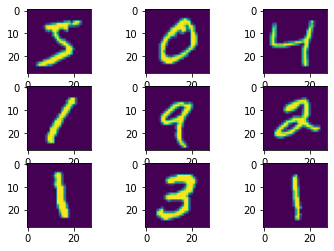

In [ ]:
# iterate through images dataset and print samples
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(training_images[i])

In [ ]:
# print the matrix holding the training images data
# 60000 training images and 10000 testing images that are 28x28 pixels
# minimum value in matrix is 0 and maximum is 255 representing color of pixel
print(training_images.shape)
# print the the array
print(training_images[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [ ]:
# normalize data to a range of 0 to 1 to increase speed of the model
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
# build the neural network using sequential layers of neurons
"""A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
Flatten input 2d shape into 1 dimension. The dense layer ensures that each neuron in previous layer is connected to a neuron in 
the next layer. 128 neurons were selected for the hidden layer. The rectified linear activation function or ReLU for short is a piecewise 
linear function that will output the input directly if it is positive, otherwise, it will output zero. 
The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time.
10 neurons in the output layer for 10 classes from 0-9. The softmax function is a function that turns a vector 
of K real values into a vector of K real values that sum to 1. The input values can be positive, negative, zero, or 
greater than one, but the softmax transforms them into values between 0 and 1, so that they can be interpreted as probabilities. 
It is a form of multiclass logistic regression."""
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
# compile the Keras model
"""Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
Sparse Categorical Crossentropy computes the crossentropy loss between the labels and predictions."""
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# fit the model to the training data
"""An epoch refers to one iteration through the training data. Accuracy reaches 99% in the 7th epoch."""
model.fit(training_images, training_labels, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2579 - accuracy: 0.9258
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1141 - accuracy: 0.9663
Epoch 3/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0788 - accuracy: 0.9764
Epoch 4/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0582 - accuracy: 0.9821
Epoch 5/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0452 - accuracy: 0.9858
Epoch 6/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0354 - accuracy: 0.9889
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0285 - accuracy: 0.9915


In [ ]:
# evaluate model on the held out testing data and print the accuracy
print(model.evaluate(test_images,test_labels))

313/313 [==============================] - 0s 1ms/step - loss: 0.0809 - accuracy: 0.9772
[0.08094623684883118, 0.9771999716758728]


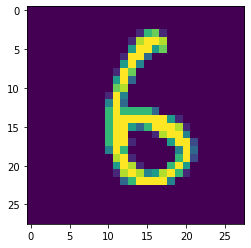

In [ ]:
# select image from testing data from 0-9999
plt.imshow(test_images[3000])

In [ ]:
# run model to predict the number of the image
prediction=model.predict(test_images)
"""np.argmax finds the neuron with the highest probability."""
print("The number is:", np.argmax(prediction[3000]))

The number is: 6


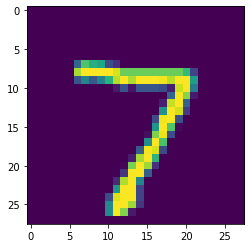

In [ ]:
# select image from testing data from 0-9999
plt.imshow(test_images[0])

In [ ]:
# run model to predict the number of the image
prediction=model.predict(test_images)
"""np.argmax finds the neuron with the highest probability."""
print("The number is:", np.argmax(prediction[0]))

The number is: 7


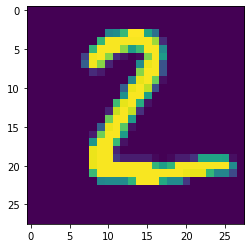

In [ ]:
# select image from testing data from 0-9999
plt.imshow(test_images[1])

In [ ]:
# run model to predict the number of the image
prediction=model.predict(test_images)
"""np.argmax finds the neuron with the highest probability."""
print("The number is:", np.argmax(prediction[1]))

The number is: 2


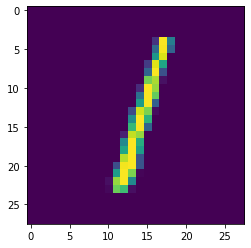

In [ ]:
# select image from testing data from 0-9999
plt.imshow(test_images[2])

In [ ]:
# run model to predict the number of the image
prediction=model.predict(test_images)
"""np.argmax finds the neuron with the highest probability."""
print("The number is:", np.argmax(prediction[2]))

The number is: 1


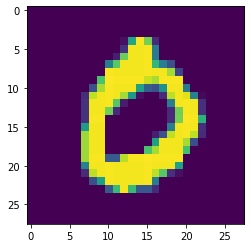

In [ ]:
# select image from testing data from 0-9999
plt.imshow(test_images[3])

In [ ]:
# run model to predict the number of the image
prediction=model.predict(test_images)
"""np.argmax finds the neuron with the highest probability."""
print("The number is:", np.argmax(prediction[3]))

The number is: 0


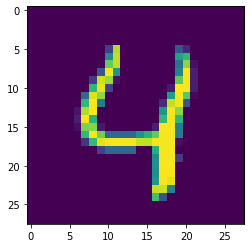

In [ ]:
# select image from testing data from 0-9999
plt.imshow(test_images[4])

In [ ]:
# run model to predict the number of the image
prediction=model.predict(test_images)
"""np.argmax finds the neuron with the highest probability."""
print("The number is:", np.argmax(prediction[4]))

The number is: 4


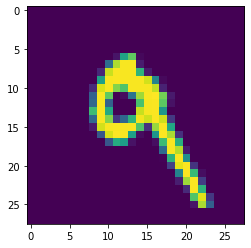

In [ ]:
# select image from testing data from 0-9999
plt.imshow(test_images[7])

In [ ]:
# run model to predict the number of the image
prediction=model.predict(test_images)
"""np.argmax finds the neuron with the highest probability."""
print("The number is:", np.argmax(prediction[7]))

The number is: 9


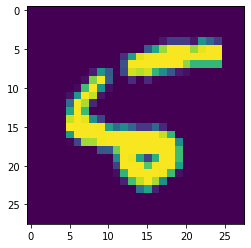

In [ ]:
# select image from testing data from 0-9999
plt.imshow(test_images[8])

In [ ]:
# run model to predict the number of the image
prediction=model.predict(test_images)
"""np.argmax finds the neuron with the highest probability."""
print("The number is:", np.argmax(prediction[8]))

The number is: 5


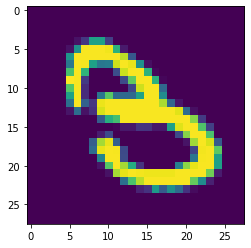

In [ ]:
# select image from testing data from 0-9999
plt.imshow(test_images[18])

In [ ]:
# run model to predict the number of the image
prediction=model.predict(test_images)
"""np.argmax finds the neuron with the highest probability."""
print("The number is:", np.argmax(prediction[18]))

The number is: 3


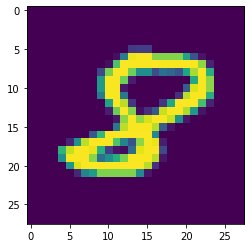

In [ ]:
# select image from testing data from 0-9999
plt.imshow(test_images[61])

In [ ]:
# run model to predict the number of the image
prediction=model.predict(test_images)
"""np.argmax finds the neuron with the highest probability."""
print("The number is:", np.argmax(prediction[61]))

The number is: 8



Confusion matrix
[[ 970    0    0    0    2    0    1    1    5    1]
 [   0 1111    3    1    0    0    2    2   15    1]
 [   0    0 1011    2    2    0    1    5   10    1]
 [   2    0    4  987    1    1    0    4   10    1]
 [   0    0    2    0  952    1    3    0    4   20]
 [   2    0    0    9    1  865    1    1   10    3]
 [   6    2    1    0    7    5  930    2    4    1]
 [   2    1    8    2    0    0    0 1002    5    8]
 [   7    0    3    2    2    0    0    2  957    1]
 [   1    2    0    3    6    2    1    3    4  987]]



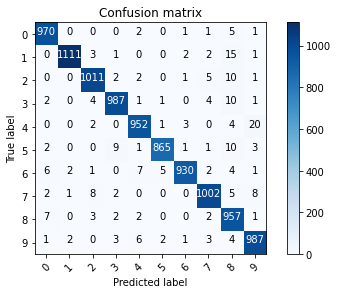

In [32]:
# SHOW CONFUSION MATRIX

def plot_confusion_matrix(cm, test_images,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      cm = cm * 100
      print("\nNormalized confusion matrix")
  else:
      print('\nConfusion matrix')
  print(cm)
  print ()

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(test_images))
  plt.xticks(tick_marks, test_images, rotation=45)
  plt.yticks(tick_marks, test_images)

  fmt = '.0f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Compute confusion matrix
y_pred = np.argmax(prediction, axis=1)
cnf_matrix = confusion_matrix(test_labels, y_pred)
np.set_printoptions(precision=2) # set NumPy to 2 decimal places

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, test_images=class_names,
                      title='Confusion matrix')